In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('TATAMOTORS.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,173.500000,174.199997,171.300003,173.449997,173.449997,6715543
1,2019-01-02,170.600006,171.750000,168.000000,168.550003,168.550003,13410104
2,2019-01-03,169.000000,170.149994,165.100006,166.050003,166.050003,9321842
3,2019-01-04,169.000000,171.949997,168.500000,170.949997,170.949997,17650435
4,2019-01-07,173.199997,178.199997,173.199997,175.350006,175.350006,21438351


In [7]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1041,2023-03-16,413.299988,418.500000,405.000000,415.700012,415.700012,11854885
1042,2023-03-17,419.000000,423.450012,414.549988,419.000000,419.000000,8658701
1043,2023-03-20,415.600006,416.950012,405.500000,410.750000,410.750000,10075022
1044,2023-03-21,412.850006,413.899994,407.700012,412.549988,412.549988,7391950
1045,2023-03-22,416.000000,418.399994,413.750000,416.100006,416.100006,5728054


In [8]:
df1=df.reset_index()['Close']

In [9]:
df1

0       173.449997
1       168.550003
2       166.050003
3       170.949997
4       175.350006
           ...    
1041    415.700012
1042    419.000000
1043    410.750000
1044    412.549988
1045    416.100006
Name: Close, Length: 1046, dtype: float64

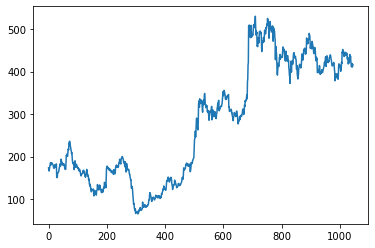

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)



In [11]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,173.500000,174.199997,171.300003,173.449997,173.449997,6715543
1,2019-01-02,170.600006,171.750000,168.000000,168.550003,168.550003,13410104
2,2019-01-03,169.000000,170.149994,165.100006,166.050003,166.050003,9321842
3,2019-01-04,169.000000,171.949997,168.500000,170.949997,170.949997,17650435
4,2019-01-07,173.199997,178.199997,173.199997,175.350006,175.350006,21438351
...,...,...,...,...,...,...,...
1041,2023-03-16,413.299988,418.500000,405.000000,415.700012,415.700012,11854885
1042,2023-03-17,419.000000,423.450012,414.549988,419.000000,419.000000,8658701
1043,2023-03-20,415.600006,416.950012,405.500000,410.750000,410.750000,10075022
1044,2023-03-21,412.850006,413.899994,407.700012,412.549988,412.549988,7391950


In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:

print(df1)

[[0.23265567]
 [0.22211465]
 [0.21673657]
 ...
 [0.74314291]
 [0.7470151 ]
 [0.75465201]]


In [15]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(679, 367)

In [17]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [18]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [19]:
print(X_train.shape), print(y_train.shape)

(578, 100)
(578,)


(None, None)

In [20]:
print(X_test.shape), print(ytest.shape)

(266, 100)
(266,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [24]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
10/10 [==============================] - 8s 269ms/step - loss: 0.0448 - val_loss: 0.0111
Epoch 2/50
10/10 [==============================] - 2s 178ms/step - loss: 0.0093 - val_loss: 0.0237
Epoch 3/50
10/10 [==============================] - 2s 178ms/step - loss: 0.0051 - val_loss: 0.0125
Epoch 4/50
10/10 [==============================] - 2s 171ms/step - loss: 0.0032 - val_loss: 0.0090
Epoch 5/50
10/10 [==============================] - 2s 180ms/step - loss: 0.0026 - val_loss: 0.0035
Epoch 6/50
10/10 [==============================] - 2s 179ms/step - loss: 0.0022 - val_loss: 0.0026
Epoch 7/50
10/10 [==============================] - 2s 175ms/step - loss: 0.0020 - val_loss: 0.0024
Epoch 8/50
10/10 [==============================] - 2s 183ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 9/50
10/10 [==============================] - 2s 174ms/step - loss: 0.0017 - val_loss: 0.0025
Epoch 10/50
10/10 [==============================] - 2s 173ms/step - loss: 0.0016 - val_loss: 0.0024

In [26]:
import tensorflow as tf

In [27]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 0s 32ms/step


In [28]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

209.17203463237541

In [30]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

426.2056723682235

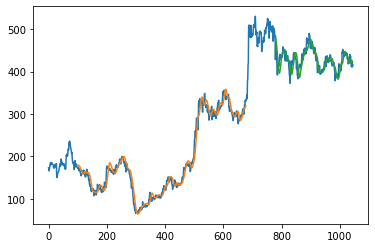

In [31]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [32]:
len(test_data)

367

In [33]:
x_input=test_data[266:].reshape(1,-1)
x_input.shape

(1, 101)

In [34]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [35]:
temp_input

[0.7413143496448286,
 0.7474453722784707,
 0.765945975938764,
 0.7676669353103028,
 0.7549746824686062,
 0.7745509018703475,
 0.7953102727729036,
 0.7913304816221572,
 0.7462622207776558,
 0.7705711107196012,
 0.7925136976599167,
 0.7999354075537407,
 0.787888498342135,
 0.7698181667931987,
 0.7712164543496921,
 0.76540816806804,
 0.7731526143138541,
 0.7717542622204161,
 0.7703559746639227,
 0.7914380819184688,
 0.7915456176778358,
 0.7913304816221572,
 0.8047756783902563,
 0.802301775092315,
 0.796170752458673,
 0.7818650760048044,
 0.7783155569654152,
 0.7632569365851442,
 0.7570183781921351,
 0.7486285237792856,
 0.750457083447136,
 0.7598149533051219,
 0.7585242015079955,
 0.7559427624506871,
 0.766483783809488,
 0.758739337563674,
 0.742605101441955,
 0.7256103856344667,
 0.7080778619562543,
 0.6734430221742422,
 0.6873184265167537,
 0.7074324537892189,
 0.7013014311555767,
 0.6896847940553281,
 0.6940948573174314,
 0.7088307413457122,
 0.7068946459184949,
 0.6890394504252372,
 0

In [36]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.74744537 0.76594598 0.76766694 0.75497468 0.7745509  0.79531027
 0.79133048 0.74626222 0.77057111 0.7925137  0.79993541 0.7878885
 0.76981817 0.77121645 0.76540817 0.77315261 0.77175426 0.77035597
 0.79143808 0.79154562 0.79133048 0.80477568 0.80230178 0.79617075
 0.78186508 0.77831556 0.76325694 0.75701838 0.74862852 0.75045708
 0.75981495 0.7585242  0.75594276 0.76648378 0.75873934 0.7426051
 0.72561039 0.70807786 0.67344302 0.68731843 0.70743245 0.70130143
 0.68968479 0.69409486 0.70883074 0.70689465 0.68903945 0.69183603
 0.681295   0.6973217  0.74776804 0.75916961 0.74636976 0.74475633
 0.74798318 0.75293099 0.7380875  0.72163059 0.72679354 0.7380875
 0.76766694 0.7609981  0.81811334 0.81391841 0.83209634 0.82037211
 0.81639232 0.81779067 0.81036889 0.79627835 0.80628157 0.79907493
 0.81865115 0.8083252  0.80724958 0.81499403 0.80950841 0.80585129
 0.81252012 0.79853712 0.78337096 0.79143808 0.77971384 0.7586318
 0.76454769 0.77594919 0.76400988 0.78025165 0.8062815

7 day output [[0.7427422]]
8 day input [0.77057111 0.7925137  0.79993541 0.7878885  0.76981817 0.77121645
 0.76540817 0.77315261 0.77175426 0.77035597 0.79143808 0.79154562
 0.79133048 0.80477568 0.80230178 0.79617075 0.78186508 0.77831556
 0.76325694 0.75701838 0.74862852 0.75045708 0.75981495 0.7585242
 0.75594276 0.76648378 0.75873934 0.7426051  0.72561039 0.70807786
 0.67344302 0.68731843 0.70743245 0.70130143 0.68968479 0.69409486
 0.70883074 0.70689465 0.68903945 0.69183603 0.681295   0.6973217
 0.74776804 0.75916961 0.74636976 0.74475633 0.74798318 0.75293099
 0.7380875  0.72163059 0.72679354 0.7380875  0.76766694 0.7609981
 0.81811334 0.81391841 0.83209634 0.82037211 0.81639232 0.81779067
 0.81036889 0.79627835 0.80628157 0.79907493 0.81865115 0.8083252
 0.80724958 0.81499403 0.80950841 0.80585129 0.81252012 0.79853712
 0.78337096 0.79143808 0.77971384 0.7586318  0.76454769 0.77594919
 0.76400988 0.78025165 0.80628157 0.80456054 0.78928685 0.79713883
 0.76820474 0.75583516 0.74

 0.74154294 0.74140424 0.74131066 0.74125826]
15 day output [[0.7412434]]
16 day input [0.77175426 0.77035597 0.79143808 0.79154562 0.79133048 0.80477568
 0.80230178 0.79617075 0.78186508 0.77831556 0.76325694 0.75701838
 0.74862852 0.75045708 0.75981495 0.7585242  0.75594276 0.76648378
 0.75873934 0.7426051  0.72561039 0.70807786 0.67344302 0.68731843
 0.70743245 0.70130143 0.68968479 0.69409486 0.70883074 0.70689465
 0.68903945 0.69183603 0.681295   0.6973217  0.74776804 0.75916961
 0.74636976 0.74475633 0.74798318 0.75293099 0.7380875  0.72163059
 0.72679354 0.7380875  0.76766694 0.7609981  0.81811334 0.81391841
 0.83209634 0.82037211 0.81639232 0.81779067 0.81036889 0.79627835
 0.80628157 0.79907493 0.81865115 0.8083252  0.80724958 0.81499403
 0.80950841 0.80585129 0.81252012 0.79853712 0.78337096 0.79143808
 0.77971384 0.7586318  0.76454769 0.77594919 0.76400988 0.78025165
 0.80628157 0.80456054 0.78928685 0.79713883 0.76820474 0.75583516
 0.74443366 0.75379153 0.76089057 0.743142

 0.74164724 0.74174482 0.7418378  0.74192297]
25 day output [[0.741998]]
26 day input [0.76325694 0.75701838 0.74862852 0.75045708 0.75981495 0.7585242
 0.75594276 0.76648378 0.75873934 0.7426051  0.72561039 0.70807786
 0.67344302 0.68731843 0.70743245 0.70130143 0.68968479 0.69409486
 0.70883074 0.70689465 0.68903945 0.69183603 0.681295   0.6973217
 0.74776804 0.75916961 0.74636976 0.74475633 0.74798318 0.75293099
 0.7380875  0.72163059 0.72679354 0.7380875  0.76766694 0.7609981
 0.81811334 0.81391841 0.83209634 0.82037211 0.81639232 0.81779067
 0.81036889 0.79627835 0.80628157 0.79907493 0.81865115 0.8083252
 0.80724958 0.81499403 0.80950841 0.80585129 0.81252012 0.79853712
 0.78337096 0.79143808 0.77971384 0.7586318  0.76454769 0.77594919
 0.76400988 0.78025165 0.80628157 0.80456054 0.78928685 0.79713883
 0.76820474 0.75583516 0.74443366 0.75379153 0.76089057 0.74314291
 0.7470151  0.75465201 0.75720775 0.75297642 0.74965578 0.7471903
 0.74542916 0.74419928 0.74334437 0.74274218 0.7

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
import matplotlib.pyplot as plt

In [39]:
len(df1)

1046

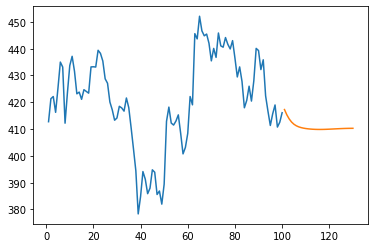

In [44]:
plt.plot(day_new,scaler.inverse_transform(df1[946:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output));

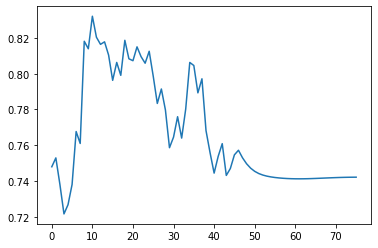

In [45]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [46]:
df3=scaler.inverse_transform(df3).tolist()

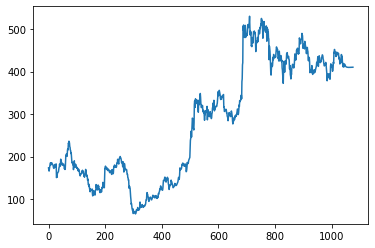

In [47]:
plt.plot(df3)

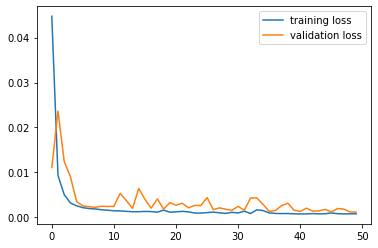

In [48]:
# Plotting the loss iteration
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label ='validation loss')
plt.legend()